# NewSight Work Flow

1. 데이터 불러오기
2. 전처리, 명사추출 
3. 노이즈 제거 
4. (유의어, 불용어 처리)  -> 이후 2번 업데이트
5. TF-IDF 벡터화 
6. LDA 
7. LDA 주제별 문서 뽑기 
8. 문서검색(없어도될듯) 
9. 주제별 TF-IDF, Doc2Vec 벡터화 
10. 군집화, 시각화

데이터 불러오기 -> 전처리, 명사추출 -> 노이즈 제거 -> (유의어, 불용어 처리) -> TF-IDF 벡터화 -> LDA -> LDA 주제별 문서 뽑기 -> 문서검색(없어도될듯) -> 주제별 TF-IDF, Doc2Vec 벡터화 -> 군집화, 시각화

In [1]:
import newsight
newsight.readme()

******Description*****
code by 현호킴, description by 승현백
클래스 이름.help() : 해당 클래스에서 사용할 수 있는 함수 출력
******Class names******
1) 데이터 불러오기 : Pickle2DF
2) 전처리 : PreprocessingText
3) 불용어,유의어 처리 : GetSimilarWords, GetStopWords
4) 문서 검색 :  GetDocsFromQuery
5) 벡터화 :  Vectorizer
6) 시각화 : Get2DPlot, AnalyzingNewsData
**********************


## 데이터 불러오기

In [339]:
mirae_list = ['data/미래에셋대우/rawdata_미래에셋대우.pickle']
blizzard_list = ['data/블리자드/rawdata_경향신문_블리자드.pickle',
                'data/블리자드/rawdata_국민일보_블리자드.pickle',
                'data/블리자드/rawdata_동아일보_블리자드.pickle',
                'data/블리자드/rawdata_디지털타임즈_블리자드.pickle',
                'data/블리자드/rawdata_매일경제_블리자드.pickle',
                'data/블리자드/rawdata_머니투데이_블리자드.pickle',
                'data/블리자드/rawdata_문화일보_블리자드.pickle',
                'data/블리자드/rawdata_서울신문_블리자드.pickle',
                'data/블리자드/rawdata_세계일보_블리자드.pickle',
                'data/블리자드/rawdata_아주경제_블리자드.pickle',
                'data/블리자드/rawdata_전자신문_블리자드.pickle',
                'data/블리자드/rawdata_조선일보_블리자드.pickle',
                'data/블리자드/rawdata_중앙일보_블리자드.pickle',
                'data/블리자드/rawdata_한겨레_블리자드.pickle',
                'data/블리자드/rawdata_한국경제_블리자드.pickle',
                'data/블리자드/rawdata_한국일보_블리자드.pickle',
                ]

data_list = mirae_list

In [340]:
data_loader = newsight.Pickle2DF()
df = data_loader.get_dataframe_from_list(data_list)

In [341]:
df.head()

,date,title,content,date_tmp
0,2019-04-19,"NH투자證 `선택과 집중` 통했다…펀드설정액, 증권사 1위에 올라",지난해 말 조직개편을 통해 펀드 판매에 승부수를 띄운 NH투자증권이 올해 들어 금융...,737168
1,2019-04-19,"2차전지 기업들, 속속 '코스닥 입성' 채비","코윈테크, 8월 코스닥 상장 추진 \n \n \n[ 이우상 기자 ] 2차전지 생산용...",737168
2,2019-04-19,증시 호조에 증권株 `훨훨`…2분기 실적도 `맑음`,올해 들어 증시가 호조를 보이면서 증권주들이 1분기 양호한 성적표를 받아들었다. 이...,737168
3,2019-04-19,"한화 LifePlus TDF 설정 1년, 4% 대 운용성과 달성",한화 라이프플러스 상장지수펀드(ETF)의 수익률이 설정 이후 양호한 수익률을 올리고...,737168
4,2019-04-19,"미래에셋벤처투자의 사회적기업1호펀드, 72.4% 수익 올리고 청산돼",미래에셋벤처투자는 지난 2011년 42억원으로 결성했던 사회적기업1호펀드가 72.4...,737168


In [342]:
tmp_idx = []
for idx in range(df.shape[0]):
    if '미래에셋' in df.iloc[idx]['title'] : tmp_idx.append(idx)

In [344]:
# 데이터 크기 줄이기
import random
def reduction(data, number=100):
    rand_idx = random.sample(range(number),number)
    return df.iloc[rand_idx].copy()

# df_2 = reduction(df, 100) 
# or
# df_2 = df.copy()
df_2 = df.iloc[tmp_idx].copy()
len(df_2)

2172

## 전처리, 명사추출

In [345]:
preprocessor = newsight.PreprocessingText()
preprocessor.help()

/home/lab03/.local/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


******PreprocessingText******
1) make_content_re('dataframe') : content 열 전처리 후, 'content_re'열에 저장
2) add_noun_dict('list') : 명사 사전에 단어 추가
3) add_stopwords('list') : 불용어 사전에 단어 추가
4) tokenize('dataframe') : 데이터 프레임에 'tokenized_doc' 열을 추가하고, 토큰화된 문서를 저장한다
*****************************


### 명사 추가

In [346]:
noun_list = ['그리고', '미래에셋','미래에셋대우','ibk']
preprocessor.add_noun_dict(noun_list)

추가한 명사
['그리고', '미래에셋', '미래에셋대우', 'ibk']


### 불용어 추가

In [347]:
stopwords_list = ['은', '는', '이', '가', '것']
preprocessor.add_stopwords(stopwords_list)

추가한 불용어
['은', '는', '이', '가', '것']


### 정규표현식 전처리 

In [348]:
df_pre_1 = preprocessor.make_content_re(df_2) 

### 명사 추출 

In [349]:
df_pre_2 = preprocessor.tokenize(df_pre_1) 

추가한 명사: ['그리고', '미래에셋', '미래에셋대우', 'ibk']
불용어:  ['은', '는', '이', '가', '것']


In [350]:
df_pre_2.head()

,date,title,content,date_tmp,content_re,tokenized_doc
4,2019-04-19,"미래에셋벤처투자의 사회적기업1호펀드, 72.4% 수익 올리고 청산돼",미래에셋벤처투자는 지난 2011년 42억원으로 결성했던 사회적기업1호펀드가 72.4...,737168,미래에셋벤처투자는 지난 억원으로 결성했던 사회적기업호펀드가 .%의 수익을 올린 뒤...,"[미래에셋, 처, 투자, 지난, 억원, 결성, 사회, 적기, 업호, 펀드, 의, 수..."
5,2019-04-19,"미래에셋대우-에트리홀딩스, 중소·벤처기업 성장지원 업무 협약",[ 이송렬 기자 ] \n \n미래에셋대우는 미래에셋센터원에서 에트리홀딩스(주)와 '...,737168,"[ ] \n \n미래에셋대우는 미래에셋센터원에서 에트리홀딩스 주 와 중소, 벤처...","[미래에셋대우, 미래에셋, 센터, 원, 에트리, 홀딩스, 주, 중소, 벤처기업, 성..."
6,2019-04-19,"미래에셋대우, 에트리홀딩스와 `중소·벤처기업 성장 지원` MOU 체결",미래에셋대우는 지난 18일 서울 중구 미래에셋센터원에서 에트리홀딩스와 '중소·벤처 ...,737168,미래에셋대우는 지난 서울 중구 미래에셋센터원에서 에트리홀딩스와 중소 벤처 기업 ...,"[미래에셋대우, 지난, 서울, 중구, 미래에셋, 센터, 원, 에트리, 홀딩스, 중소..."
10,2019-04-19,"'미래에셋대우우' 52주 신고가 경신, 기관 4일 연속 순매수(7,700주)","◆ 주체별 매매동향 \n- 기관 4일 연속 순매수(7,700주) \n지난 한달을 기...",737168,"주체별 매매동향 \n- 기관 연속 순매수 ,주 \n지난 한달을 기준으로 보면...","[주체, 별, 매매, 동향, 기관, 연속, 순, 매수, 주, 지난, 달, 기준, 외..."
11,2019-04-19,"'미래에셋대우우' 5% 이상 상승, 기관 4일 연속 순매수(7,700주)","◆ 주체별 매매동향 \n- 기관 4일 연속 순매수(7,700주) \n지난 한달을 기...",737168,"주체별 매매동향 \n- 기관 연속 순매수 ,주 \n지난 한달을 기준으로 보면...","[주체, 별, 매매, 동향, 기관, 연속, 순, 매수, 주, 지난, 달, 기준, 외..."


필요한 함수(성윤)
1. 유의어 사전
2. 유의어 대체 함수

## 노이즈 제거

In [351]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
def count_topic(tokenized_doc, topic):
    counting = []
    for news in tokenized_doc:
        counting.append(news.count(topic))
    return counting

def plot_hist(counting):
    counting_pd = pd.Series(counting)
    bins = len(counting_pd.value_counts())
    counting_pd.hist(figsize=(16, 12), bins=bins+20)
    plt.xlabel("counting", fontsize=14)
    plt.show()

def get_proper_news(data, counting, threshold):
    select = np.array(counting) >= threshold
    print('number of total data:', len(data))
    print('number of proper data:', sum(select))
    return data[select].copy()

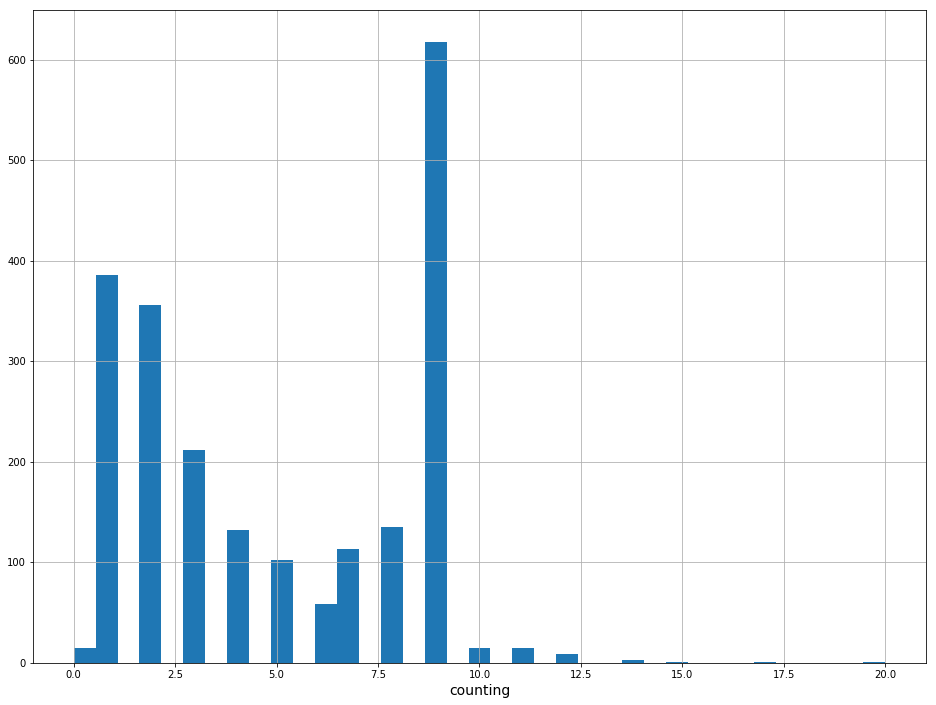

In [358]:
counting = count_topic(df_pre_2.tokenized_doc, "미래에셋대우")
plot_hist(counting)

In [360]:
data = get_proper_news(df_pre_2, counting, threshold=1)

number of total data: 2172
number of proper data: 2157


필요한 함수
1. 노이즈 제거 방법을 제목에 주제어 미포함으로 했을 때 노이즈 제거 함수 

## 유의어, 불용어 처리

In [174]:
similar_words = newsight.GetSimilarWords()
similar_words.help()

******GetSimilarWords******
1) get_model('토큰화된 문서 시리즈','doc2vec 후 차원 크기') : doc2vec 모델 학습
2) get_similar_words('단어') : 유의어 출력
*****************************


### word2vec으로 유의어 찾기

In [175]:
similar_words.get_model(data.tokenized_doc,size = 300)

In [176]:
similar_words.get_similar_words('투자')

단어 : 유사도
전통 : 0.6753637194633484
투 : 0.6655955910682678
찾기 : 0.6520261168479919
덕분 : 0.6437833309173584
발판 : 0.6404053568840027
밀라노 : 0.6394182443618774
모험 : 0.6324676871299744
아시아 : 0.6299141049385071
풍부 : 0.6297221779823303
골드만삭스 : 0.6288044452667236


### bow로 불용어 찾기

In [177]:
stop_words = newsight.GetStopWords()
stop_words.help()

******GetStopWords******
1)get_bow('토큰화된 문서 시리즈') : bow 생성
2)get_stop_words('단어 출현 빈도 순위  n ') : 단어 출현 빈도 상위 n 개, 하위 n 개 출력
*****************************


In [178]:
stop_words.get_bow(data.tokenized_doc)
stop_words.get_stop_words(10) # 출현 빈도 상위,하위 10위 단어 출력

미래에셋대우
투자
증권
등
억원
수
해외
글로벌
증권사
금융
대중화
부팀
펜
자개
기유
명사회
비씨카드
외풍
존속
준결승


# 카테고리화!!

## TF-IDF 벡터화 

In [179]:
vectorizer = newsight.Vectorizer()
vectorizer.help()

******GetDocsFromQuery******
1)get_tfidf_vec('토큰화된 문서 시리즈','단어 수') : 문서를 tfidf 벡터(x) 와 단어(words)로 반환
2)get_doc2vec('토큰화된 문서 시리즈') : doc2vec 벡터 반환
3)load_doc2vec_model('토큰화된 문서 시리즈','모델객체이름') : 저장된 모델로  doc2vec 벡터 반환
*****************************


In [180]:
x_tfidf, words = vectorizer.get_tfidf_vec(data.tokenized_doc,max_feat=5000) # tf idf

## LDA

In [181]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                               max_iter=25, random_state=0)
document_topics = lda.fit_transform(x_tfidf)

In [182]:
def get_topics(components, feature_names, n=5):
    issues = []
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), 
              [(feature_names[i], topic[i].round(2), i) for i in topic.argsort()[:-n - 1:-1]])
        tmp = []
        tmp.extend(feature_names[i] for i in topic.argsort()[:-n - 1:-1])
        issues.append(tmp)
    return issues

In [183]:
issues = get_topics(lda.components_, words)

Topic 1: [('기초자산', 18.5, 619), ('만기', 12.11, 1209), ('지급', 8.69, 3906), ('미만', 7.83, 1421), ('최초', 7.61, 4181)]
Topic 2: [('과징금', 4.04, 380), ('차명계좌', 3.91, 4021), ('채용', 3.84, 4063), ('학자금', 2.2, 4693), ('공장', 2.2, 355)]
Topic 3: [('투표', 5.67, 4445), ('탁구', 3.71, 4364), ('골딘', 2.47, 320), ('낸셜', 2.45, 745), ('투표제', 2.13, 4446)]
Topic 4: [('미래에셋대우', 60.61, 1419), ('증권', 58.0, 3888), ('투자', 55.47, 4439), ('억원', 41.3, 2617), ('해외', 34.08, 4778)]
Topic 5: [('호반', 4.76, 4846), ('차트', 2.16, 4031), ('회차', 1.36, 4956), ('리니지', 1.26, 1148), ('배열', 1.24, 1550)]


In [184]:
issues

[['기초자산', '만기', '지급', '미만', '최초'],
 ['과징금', '차명계좌', '채용', '학자금', '공장'],
 ['투표', '탁구', '골딘', '낸셜', '투표제'],
 ['미래에셋대우', '증권', '투자', '억원', '해외'],
 ['호반', '차트', '회차', '리니지', '배열']]

## LDA 주제별 문서 뽑기

In [185]:
data_from_issues  = newsight.GetIssuesBasedDataFrame()

In [186]:
issues_based_data = data_from_issues.get_issues_based_dataframe(data, issues, length=150)

In [187]:
for i in range(len(issues_based_data)):
    display(issues_based_data[i].head())

,date,title,content,date_tmp,content_re,tokenized_doc
2085,2019-01-14,"미래에셋대우, 달러 청약 ELS 등 투자상품 9종 판매",미래에셋대우는 달러 청약 ELS를 비롯한 9종의 상품을 약 1250억원 규모로 판매...,737073,미래에셋대우는 달러 청약 ELS를 비롯한 종의 상품을 약 억원 규모로 판매한다고 ...,"[미래에셋대우, 달러, 청약, 를, 비롯, 종, 상품, 약, 억원, 규모, 판매, ..."
8658,2018-04-09,"미래에셋대우, 주가연계증권 9종 판매",미래에셋대우는 오는 13일 오후 1시30분까지 1150억원 규모의 주가연계증권(EL...,736793,미래에셋대우는 오는 오후 까지 억원 규모의 주가연계증권 ELS 종을 판매한다고 ...,"[미래에셋대우, 오후, 까지, 억원, 규모, 주가, 계, 증권, 종, 판매, 회, ..."
6859,2018-06-18,"미래에셋대우, 주가연계증권 11종 판매",미래에셋대우는 오는 22일 오후 1시30분까지 주가연계증권(ELS) 총 11종을 약...,736863,미래에셋대우는 오는 오후 까지 주가연계증권 ELS 총 종을 약 억원 규모로 판매...,"[미래에셋대우, 오후, 까지, 주가, 계, 증권, 총, 종, 약, 억원, 규모, 판..."
8028,2018-04-30,"미래에셋대우, 주가연계증권 7종 판매",미래에셋대우는 다음 달 4일 오후 1시30분까지 주가연계증권(ELS) 7종을 약 9...,736814,미래에셋대우는 다음 달 오후 까지 주가연계증권 ELS 종을 약 억원 규모로 판매...,"[미래에셋대우, 다음, 달, 오후, 까지, 주가, 계, 증권, 종, 약, 억원, 규..."
7242,2018-05-28,"미래에셋대우, 주가연계증권 9종 판매",미래에셋대우는 28일 연 4.5%에서 연 8.3%까지 다양한 구조의 지수형 주가연계...,736842,미래에셋대우는 연 .%에서 연 .%까지 다양한 구조의 지수형 주가연계증권 ELS ...,"[미래에셋대우, 연, 연, 까지, 다양, 구조, 지수, 형, 주가, 계, 증권, 종..."


,date,title,content,date_tmp,content_re,tokenized_doc
8569,2018-04-12,"금융위, 이건희 차명계좌 증권사 4곳 34억 과징금 부과",금융당국이 이건희 삼성그룹 회장의 차명계좌를 보유한 증권사 4곳에 과징금 34억원을...,736796,금융당국이 이건희 삼성그룹 회장의 차명계좌를 보유한 증권사 곳에 과징금 억원을 부과...,"[금융, 당국, 이건희, 삼성, 그룹, 회장, 차명계좌, 보유, 증권사, 곳, 과징..."
8559,2018-04-12,"금융위, 이건희 차명계좌 보유 증권사에 과징금 34억 부과",금융위원회가 이건희 삼성그룹 회장의 차명계좌를 보유한 신한금융투자 등 4개 증권사에...,736796,금융위원회가 이건희 삼성그룹 회장의 차명계좌를 보유한 신한금융투자 등 개 증권사에 ...,"[금융, 위원회, 이건희, 삼성, 그룹, 회장, 차명계좌, 보유, 신한, 금융투자,..."
8576,2018-04-12,"금융위, 이건희 차명계좌 증권사에 과징금 34억 부과",[머니투데이 김훈남 기자] [61.8억 자산가액 50%에 가산금 더해…실명전환 통보...,736796,[머니투데이 ] [.억 자산가액 %에 가산금 더해 실명전환 통보도]\n\n 이건희 ...,"[머니투데이, 억, 자산, 가액, 가산금, 실명, 전환, 통보, 이건희, 삼성, 그..."
8575,2018-04-12,"금융위, 이건희 차명계좌 보유한 4개 증권사에 과징금 34억",금융위원회가 이건희 삼성그룹 회장의 차명계좌를 보유한 미래에셋대우 등 4개사에 총 ...,736796,금융위원회가 이건희 삼성그룹 회장의 차명계좌를 보유한 미래에셋대우 등 개사에 총 억...,"[금융, 위원회, 이건희, 삼성, 그룹, 회장, 차명계좌, 보유, 미래에셋대우, 등..."
8553,2018-04-12,‘이건희 차명계좌’ 4개 증권사에 34억 과징금,금융위원회가 이건희 삼성그룹 회장 차명계좌를 보유한 증권사에 과징금 34억원을 부과...,736796,금융위원회가 이건희 삼성그룹 회장 차명계좌를 보유한 증권사에 과징금 억원을 부과하기...,"[금융, 위원회, 이건희, 삼성, 그룹, 회장, 차명계좌, 보유, 증권사, 과징금,..."


,date,title,content,date_tmp,content_re,tokenized_doc
1518,2019-02-07,전자투표 도입 쉬워진다…새 주주친화책 부상,전자투표가 새로운 주주친화 정책으로 부상하고 있는 가운데 상장사들이 전자투표제를 도...,737097,전자투표가 새로운 주주친화 정책으로 부상하고 있는 가운데 상장사들이 전자투표제를 도...,"[전자, 투표, 새, 주주, 친, 정책, 부상, 가운데, 상장, 전자, 투표제, 도..."
1468,2019-02-10,전자투표제 확산일로...'주총 문화' 새바람 부나,"주주행동주의 확산에 전자투표제 도입이 급물살을 타고 있다.\n\nSK하이닉스, 신세...",737100,"주주행동주의 확산에 전자투표제 도입이 급물살을 타고 있다.\n\nSK하이닉스, 신세...","[주, 주행, 동주, 확산, 전자, 투표제, 도입, 급, 물살, 타고, 하이닉스, ..."
1279,2019-02-14,주총 ‘전자투표’ 도입 상장사 급증…소액주주 권리 행사 훈풍,ㆍ예탁원 “상장사 58%가 이용 계약…연내 1400곳으로 늘 것”\n\n미래에셋대우...,737104,"ㆍ예탁원 상장사 %가 이용 계약 연내 곳으로 늘 것 \n\n미래에셋대우, 오늘부터...","[예, 탁원, 상장, 사, 이용, 계약, 연내, 곳, 늘, 미래에셋대우, 오늘, 부..."
1124,2019-02-20,"전자투표제 봇물…포스코 도입, 삼성전자도 검토",전자투표제도가 탄력을 받았다. 3월 주주총회를 앞두고 전자투표제도를 도입하는 기업이...,737110,전자투표제도가 탄력을 받았다. 주주총회를 앞두고 전자투표제도를 도입하는 기업이 빠...,"[전자, 투표제, 탄력, 주주총회, 전자, 투표제, 를, 도, 입하, 기업, 추세,..."
3452,2018-11-09,[단독] 미래에셋 주총 전자투표 서비스 무료 제공한다,9일 금융투자업계에 따르면 미래에셋대우의 IB플랫폼사업부는 태스크포스(TF)팀을 만...,737007,금융투자업계에 따르면 미래에셋대우의 IB플랫폼사업부는 태스크포스 TF 팀을 만들어...,"[금융투자, 업계, 미래에셋대우, 플랫폼, 사업, 태스크포스, 팀, 전자, 투표, ..."


,date,title,content,date_tmp,content_re,tokenized_doc
3141,2018-11-19,"[여의도 Talk] 증권가 실적, 미래·삼성 ‘흐림’ vs NH·한투 ‘맑음’",주요 증권사의 지난 3분기 실적 명암이 크게 엇갈려. NH투자증권과 KB증권 등은 ...,737017,주요 증권사의 지난 기 실적 명암이 크게 엇갈려. NH투자증권과 KB증권 등은 전...,"[주요, 증권사, 지난, 기, 실적, 명암, 크게, 투자, 증권, 증권, 등, 전보..."
3785,2018-10-28,"국내 초대형 투자은행들, 아시아서 몸집불리기 경쟁","한투, 홍콩법인에 4500억 투입 \n미래에셋, 싱가포르에 720억 출자 \n \n...",736995,"한투, 홍콩법인에 억 투입 \n미래에셋, 싱가포르에 억 출자 \n \n \n[ ]...","[투, 홍콩, 법인, 억, 투입, 미래에셋, 싱가포르, 억, 출자, 자기, 자본, ..."
4335,2018-10-01,[단독] 증권사 해외 수익 늘었지만…미래에셋대우가 75% 차지,국내 증권사들의 상반기 해외영업이익은 2년 전 연간 이익의 17배에 달하는 것으로 ...,736968,국내 증권사들의 상반기 해외영업이익은 전 연간 이익의 배에 달하는 것으로 집계됐다...,"[국내, 증권사, 상반기, 해외, 영업, 전, 연간, 이익, 배, 달, 집계, 다만..."
3266,2018-11-14,"미래에셋·삼성證 순이익 급감, KB·NH證은 개선…증권사 3분기 실적 '희비'","미래에셋대우 순이익 43% 줄어 \n""거래대금 30% 감소 여파"" \n사업구조 분산...",737012,미래에셋대우 순이익 % 줄어 \n 거래대금 % 감소 여파 \n사업구조 분산된 한투...,"[미래에셋대우, 순이익, 거래, 대금, 감소, 여파, 사업, 구조, 분산, 투, 선..."
7295,2018-05-24,유럽으로 몰리는 코리아머니…런던·브뤼셀 부동산 줄줄이 인수,"[머니투데이 배규민 기자] [조달 비용 낮고 환헤지 이점, ""연 5% 이상 안정적 ...",736838,"[머니투데이 ] [조달 비용 낮고 환헤지 이점, 연 % 이상 안정적 수익 기대]...","[머니투데이, 조달, 비용, 환, 헤지, 이점, 연, 이상, 안정, 적, 수익, 기..."


,date,title,content,date_tmp,content_re,tokenized_doc
3524,2018-11-07,"[한경로보뉴스] '미래에셋대우' 5% 이상 상승, 대형 증권사 매수 창구 상위에 등...","07일 오후 13시 13분 현재 미래에셋대우는 전 거래일보다 5.11% 오른 7,4...",737005,"오후 현재 미래에셋대우는 전 거래일보다 .% 오른 ,원에 거래되고 있다. 주가...","[오후, 현재, 미래에셋대우, 전, 거래, 일보, 오른, 원, 거래, 주가, 흐름,..."
3637,2018-11-02,"[한경로보뉴스] '미래에셋대우' 5% 이상 상승, 외국계 증권사 창구의 거래비중 9...","02일 오전 10시 22분 현재 미래에셋대우는 전 거래일보다 5.12% 오른 6,7...",737000,"오전 현재 미래에셋대우는 전 거래일보다 .% 오른 ,원에 거래되고 있다. 주가...","[오전, 현재, 미래에셋대우, 전, 거래, 일보, 오른, 원, 거래, 주가, 흐름,..."
7303,2018-05-24,"[한경로보뉴스] '미래에셋대우스팩1호' 5% 이상 상승, 주가 60일 이평선 상회,...",24일 오후 12시 19분 현재 미래에셋대우스팩1호는 전 거래일보다 6.19% 오른...,736838,"오후 현재 미래에셋대우스팩호는 전 거래일보다 .% 오른 ,원에 거래되고 있다....","[오후, 현재, 미래에셋대우, 스팩, 호, 전, 거래, 일보, 오른, 원, 거래, ..."
7650,2018-05-11,"[미래에셋대우] 5% 이상 상승, 외국계 증권사 창구의 거래비중 8% 수준",미래에셋대우가 장 초반 부터 전일 대비 +5%이상 상승하고 있다. 11일 오전 09...,736825,미래에셋대우가 장 초반 부터 전일 대비 +%이상 상승하고 있다. 오전 미래에셋...,"[미래에셋대우, 장, 초반, 부터, 전일, 대비, 이상, 상승, 오전, 미래에셋대우..."
2948,2018-11-28,"엔씨소프트, 내년 모바일 신작 기대감 선반영-미래에셋대우","[머니투데이 박계현 기자] 미래에셋대우가 28일 엔씨소프트에 대해 ""5개 대작 모바...",737026,[머니투데이 ] 미래에셋대우가 엔씨소프트에 대해 개 대작 모바일게임 출시 예정인...,"[머니투데이, 미래에셋대우, 엔씨소프트, 대해, 개, 대작, 모바일, 게임, 출시,..."


# ===============================

## 문서검색(없어도 될듯)

In [188]:
doc_selector = newsight.GetDocsFromQuery()
doc_selector.help()

******GetDocsFromQuery******
1)set_query('검색어') : 검색어 설정 
2)select_news('토큰화된 문서 시리즈') : 검색어를 포함한 문서 시리즈 반환
*****************************


In [189]:
doc_selector.set_query('미래에셋대우')

In [190]:
query_docs = doc_selector.select_news(data['tokenized_doc'])

length of selected news:  961
length of original data:  961


In [191]:
query_docs.tail()

9941    [미래에셋대우, 연속, 매경, 증권, 대상, 기업, 금융, 부문, 금, 수상, 기업...
9943    [마켓, 인사이트, 오후, 그룹, 지배구조, 개편, 자문, 주요, 증권사, 핵심, ...
9954    [테슬라, 요건, 상장, 호, 로, 코스닥시장, 입성, 앞, 카페, 공, 모주, 시...
9967    [미래에셋대우, 국내, 최초, 자산, 관리, 금융투자, 상품, 도입, 적립, 식, ...
9969    [미래에셋대우, 최근, 국내, 증권사, 가운데, 처, 음으로, 글로벌, 기업, 설명...
Name: tokenized_doc, dtype: object

## 주제별 TF-IDF, Doc2Vec 벡터화

In [192]:
vectorizer = newsight.Vectorizer()
vectorizer.help()

******GetDocsFromQuery******
1)get_tfidf_vec('토큰화된 문서 시리즈','단어 수') : 문서를 tfidf 벡터(x) 와 단어(words)로 반환
2)get_doc2vec('토큰화된 문서 시리즈') : doc2vec 벡터 반환
3)load_doc2vec_model('토큰화된 문서 시리즈','모델객체이름') : 저장된 모델로  doc2vec 벡터 반환
*****************************


### TFIDF

In [193]:
x_tfidf_list = []
words_list = []
for i in range(len(issues_based_data)):
    x_tfidf, words = vectorizer.get_tfidf_vec(issues_based_data[i].tokenized_doc,max_feat=5000) # tf idf
    x_tfidf_list.append(x_tfidf)
    words_list.append(words_list)

### Dov2Vec

In [194]:
x_doc2vec_list = []
for i in range(len(issues_based_data)):
    print("Issue %s" %i)
    x_doc2vec = vectorizer.get_doc2vec(issues_based_data[i].tokenized_doc, 
                                       model_name="d2v%s.model" %i)
    x_doc2vec_list.append(x_doc2vec)
    print("=" * 10)

Issue 0
corpus_count:  150
epoch:  0
epoch:  10
epoch:  20
epoch:  30
epoch:  40
Model Saved
Load Model
Issue 1
corpus_count:  150
epoch:  0
epoch:  10
epoch:  20
epoch:  30
epoch:  40
Model Saved
Load Model
Issue 2
corpus_count:  150
epoch:  0
epoch:  10
epoch:  20
epoch:  30
epoch:  40
Model Saved
Load Model
Issue 3
corpus_count:  150
epoch:  0
epoch:  10
epoch:  20
epoch:  30
epoch:  40
Model Saved
Load Model
Issue 4
corpus_count:  150
epoch:  0
epoch:  10
epoch:  20
epoch:  30
epoch:  40
Model Saved
Load Model


## 군집화, 시각화, 분석

### TF-IDF

In [195]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

class Get2DPlot:

    def help(self):
        print('아 난해하다 알아서 쓰세요')

    def __init__(self, x, vec_kind='tfidf',reduction_method="PCA",
                 learning_rate=200, init='pca', random_state=10,
                 cluster_method="DBSCAN", eps=7, min_sample=2, n_clusters=3):
        self.reduction_method = reduction_method
        self.learning_rate = learning_rate
        self.init = init
        self.random_state = random_state
        self.cluster_method = cluster_method
        self.eps = eps
        self.min_sample = min_sample
        self.n_clusters = n_clusters
        if vec_kind == 'tfidf':
            self.x_scaled = x
        elif vec_kind == 'doc2vec':
            self.x_scaled = StandardScaler().fit_transform(x)
        else:
            print("vec_kind must me 'tfidf' or 'doc2vec'")
            raise NotImplementedError

    def get_2D_vec(self):
        if self.reduction_method == 'TSNE':
            t_sne = TSNE(n_components=2, learning_rate=self.learning_rate, init=self.init,
                         random_state=self.random_state)
            self.vec = t_sne.fit_transform(self.x_scaled)
        elif self.reduction_method == 'PCA':
            pca = PCA(n_components=2)
            self.vec = pca.fit_transform(self.x_scaled)
        return self.vec

    def get_cluster_labels(self):
        if self.cluster_method == 'kmeans':
            cluster = KMeans(n_clusters=self.n_clusters, random_state=self.random_state).fit(self.x_scaled)
            self.cluster_labels = cluster.labels_
        elif self.cluster_method == 'DBSCAN':
            self.cluster_labels = DBSCAN(eps=self.eps, min_samples=self.min_sample, metric='cosine').fit_predict(self.x_scaled)
        vec_pd = np.c_[self.vec, self.cluster_labels]
        self.vec_pd = pd.DataFrame(vec_pd, columns=['x', 'y', 'labels'])
        print(self.cluster_labels)

    def plot2D(self):
        print(self.reduction_method, self.cluster_method)
        groups = self.vec_pd.groupby('labels')
        fig, ax = plt.subplots()
        for name, group in groups:
            ax.plot(group.x,
                    group.y,
                    marker='o',
                    linestyle='',
                    label=name)
        # ax.legend(fontsize=12, loc='upper left') # legend position

        plt.title('%s Plot of %s' % (self.reduction_method, self.cluster_method), fontsize=20)
        plt.xlabel('x', fontsize=14)
        plt.ylabel('y', fontsize=14)
        plt.show() 

In [271]:
issues

[['기초자산', '만기', '지급', '미만', '최초'],
 ['과징금', '차명계좌', '채용', '학자금', '공장'],
 ['투표', '탁구', '골딘', '낸셜', '투표제'],
 ['미래에셋대우', '증권', '투자', '억원', '해외'],
 ['호반', '차트', '회차', '리니지', '배열']]

In [227]:
issue_number = 0
x_tfidf = x_tfidf_list[issue_number]
x_doc2vec = x_doc2vec_list[issue_number]
issue_data = issues_based_data[issue_number]
print(issues[issue_number])

['기초자산', '만기', '지급', '미만', '최초']


#### 군집화, 시각화

In [265]:
cluster_tfidf = Get2DPlot(x_tfidf, 'tfidf', eps=0.5, min_sample=4)
cluster_tfidf.help()

아 난해하다 알아서 쓰세요


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1
  0 -1  1  1 -1  2  3  3  2 -1  4  2  2  2  4 -1  2  1 -1  3  3  3 -1 -1
  3  3 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  5  3 -1  1 -1  3 -1 -1  4 -1 -1 -1
 -1 -1  6 -1  4 -1 -1 -1 -1  7 -1  5  2 -1  3  2  8  7 -1  3 -1 -1 -1  6
 -1 -1 -1 -1  5  7  3  6  8 -1 -1  7 -1  8 -1  8  7 -1  7 -1 -1  6  2 -1
 -1  7 -1 -1 -1  5]
PCA DBSCAN


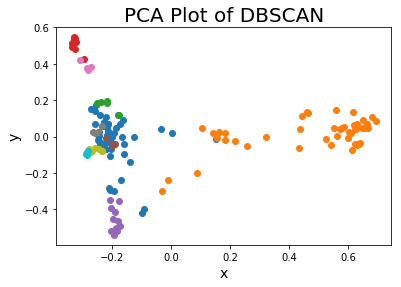

In [266]:
tfidf_2d = cluster_tfidf.get_2D_vec()
cluster_tfidf.get_cluster_labels()
cluster_tfidf.plot2D()

In [267]:
# 라벨 생성
clusters = sorted(list(set(cluster_tfidf.cluster_labels)))
issue_data['labels'] = cluster_tfidf.cluster_labels

#### 분석

In [268]:
analyzer = newsight.AnalyzingNewsData()
analyzer.help()

******AnalyzingNewsData******
1)get_n_data_per_cluster('라벨 리스트') : 클러스터 별 문서 개수 반환
2)print_news_per_cluster('토큰화된 문서 시리즈','클러스터 라벨 리스트') : 클러스터 라벨별로 제목을 출력한다.
*****************************


In [269]:
display(analyzer.get_n_data_per_cluster(cluster_tfidf.cluster_labels)[0:10])

,counts
cluster,
-1,54
0,47
3,12
2,9
7,7
1,5
8,4
6,4
5,4


In [270]:
analyzer.print_news_per_cluster(issue_data, analyzer.get_n_data_per_cluster(cluster_tfidf.cluster_labels)[1:10].index, 'title')

==================================================================================================== 0
미래에셋대우, 달러 청약 ELS 등 투자상품 9종 판매
****************************************************************************************************
미래에셋대우, 주가연계증권 9종 판매
****************************************************************************************************
미래에셋대우, 주가연계증권 11종 판매
****************************************************************************************************
미래에셋대우, 주가연계증권 7종 판매
****************************************************************************************************
미래에셋대우, 주가연계증권 9종 판매
****************************************************************************************************
미래에셋대우, 양방향 수익 추구 ELS 등 판매
****************************************************************************************************
미래에셋대우, ELS 7종 판매
****************************************************************************************************
미래에셋대우, 손실시 해외주식 지급 ELS 등 9종 

### Doc2Vec

In [221]:
cluster_doc2vec = Get2DPlot(x_doc2vec, 'doc2vec', eps=0.65, min_sample=4)
cluster_doc2vec.help()

아 난해하다 알아서 쓰세요


[ 0  0  0  0 -1  0  0  0  0  1  2  2  2  2  2  1  2  2  2  1  2  1  1  1
  2 -1  5  5  8  3 -1 -1 -1  7 -1  3  3  3  3 -1 -1 -1 -1 -1  3  3  3  3
  4 -1  5  5  5 -1  3  3  5  5  3  3 -1  5  5  6  3  7  5  7  7 -1 -1 -1
  4  3 -1 -1  5  5  5 -1 -1  5  3  5  3  3  3  3  3 -1 -1 -1  8 -1  3  3
 -1  5  8  5  8  5 -1 -1 -1  5  3 -1  3 -1 -1 -1 -1 -1  5 -1  7  6  7 -1
  7  6  7  7  7  7  7  7  7  6  3  5  7 -1  4  4 -1 -1  5  9  3  9  9  9
  8  9  9  9  5  5]
PCA DBSCAN


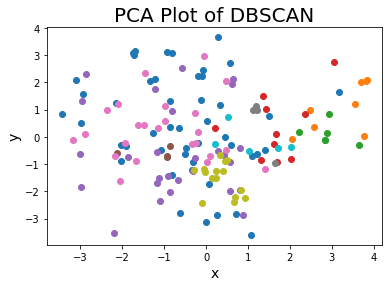

In [222]:
doc2vec_2d = cluster_doc2vec.get_2D_vec()
cluster_doc2vec.get_cluster_labels()
cluster_doc2vec.plot2D()

In [223]:
# 라벨 생성
clusters = sorted(list(set(cluster_doc2vec.cluster_labels)))
issue_data['labels'] = cluster_doc2vec.cluster_labels

#### 분석

In [224]:
analyzer = newsight.AnalyzingNewsData()
analyzer.help()

******AnalyzingNewsData******
1)get_n_data_per_cluster('라벨 리스트') : 클러스터 별 문서 개수 반환
2)print_news_per_cluster('토큰화된 문서 시리즈','클러스터 라벨 리스트') : 클러스터 라벨별로 제목을 출력한다.
*****************************


In [225]:
display(analyzer.get_n_data_per_cluster(cluster_doc2vec.cluster_labels)[0:10])

,counts
cluster,
-1,40
3,27
5,24
7,15
2,10
0,8
9,7
1,6
8,5


In [226]:
analyzer.print_news_per_cluster(issue_data, analyzer.get_n_data_per_cluster(cluster_doc2vec.cluster_labels)[1:10].index, 'title')

==================================================================================================== 3
13년 흑자 벤처캐피털 "3년내 500억 이익"
****************************************************************************************************
[종목썰쩐]초대형 증권사 미래에셋대우, IB에 던져진 숙제
****************************************************************************************************
"미래에셋대우, 4분기 순이익 부진…자본활용 수익성 보여줘야"
****************************************************************************************************
"수수료 영원히 0원" "현금 지급"…애타는 증권사들
****************************************************************************************************
미래에셋대우, `해외채권 직구 이벤트 시즌2` 진행
****************************************************************************************************
미래에셋대우, 해외선물옵션 수수료 2.19달러 이벤트
****************************************************************************************************
미래에셋대우, 해외선물옵션 수수료 2.19달러 행사 실시
***************************************************************************

In [280]:
import pickle
import datetime

In [287]:
def get_dataframe(data_name_with_route):
        with open(data_name_with_route, 'rb') as file:
            data_list = []
            while True:
                try:
                    data = pickle.load(file)
                except EOFError:
                    break
                data_list.append(data)
        # construct lists for data frame
        title = []
        content = []
        date = []
        category = []
        for news in data_list[0]['return_object']['documents']:
            title.append(news['title'])
            content.append(news['content'])
            date.append(news['published_at'][:10])  # 시간 조정이 필요하면 바꾸기
            category.append(news['category'])
        # make lists as data frame
        news_data = pd.DataFrame([])
        news_data['date'] = date
        news_data['title'] = title
        news_data['content'] = content
        news_data['category'] = category
        news_data['date_tmp'] = news_data['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').toordinal())
        return news_data

In [289]:
df = get_dataframe('data/미래에셋대우/rawdata_미래에셋대우.pickle')

In [321]:
tmp_idx = []
for idx in range(df.shape[0]):
    if '미래에셋' in df.iloc[idx]['title'] : tmp_idx.append(idx)

In [301]:
df[df['category'].apply(lambda x :  True if len(x) == 0 else False)].title

7                            고민 깊어지는 헬스케어, 해결책 찾기에 고심
17                      미래에셋대우, 수익성 개선 추세 지속 '탑픽'-케이프
30                   미래에셋대우 올림픽·신촌WM, 18~19일 투자설명회 개최
41                   1분기 ELS 미상환 발행잔액 75조원…전년비 25.2%↑
101           [고민해결! 스탁 솔루션] 카카오, 셀리드, 에스퓨얼셀, 휠라코리아 外
214              [Hot-Line] "하나제약, 마약성진통제·마취제 특화 제약사"
245                 '새내기' 박영선 중기부 장관, 독서토론 제안하며 소통 시작
387         미래에셋대우 목동·목동중앙WM, 3일 `상반기 중국 주식시장` 설명회 개최
415                    증권사 직원 연봉 1위는 `메리츠`…평균 1.4억 수령
427            한투 김연추 전 차장 지난해 연봉 '23억'…성과급 20억 포기 이직
467                                      [부음] 남연우씨 별세
490                [단독] 미래대우, 나홀로 지점 축소...올들어 29개 통폐합
498                               PC 강제종료…일거리 싸들고 카페로
504                           외국인 모델 대거 출연…글로벌 이미지 살려
525                           미래에셋대우, 권태균·박찬수 사외이사 사임
530                           미래에셋대우, 권태균·박찬수 사외이사 사임
552          [ET투자뉴스]신한지주, "2019년에도 3조…" BUY(신규)-교보증권
564                  [주총포커스]CGCG "미래에셋대우 사외이사 후보 부적합"
570                         

In [304]:
df.category

0                [경제>증권_증시, 경제>금융_재테크, 경제>유통]
1             [경제>산업_기업, 경제>증권_증시, 경제>금융_재테크]
2              [경제>증권_증시, 경제>금융_재테크, 경제>국제경제]
3              [경제>금융_재테크, 경제>증권_증시, 경제>국제경제]
4               [경제>산업_기업, 경제>증권_증시, 경제>국제경제]
5                                  [경제>산업_기업]
6                        [경제>산업_기업, 경제>취업_창업]
7                                          []
8              [경제>증권_증시, 경제>금융_재테크, 경제>국제경제]
9                                   [경제>국제경제]
10                                [경제>금융_재테크]
11                                [경제>금융_재테크]
12             [경제>증권_증시, 경제>금융_재테크, 경제>국제경제]
13             [경제>증권_증시, 경제>국제경제, 경제>금융_재테크]
14                                  [경제>국제경제]
15            [경제>증권_증시, 경제>금융_재테크, 경제>산업_기업]
16              [경제>산업_기업, 경제>증권_증시, 경제>국제경제]
17                                         []
18             [경제>증권_증시, 경제>국제경제, 경제>금융_재테크]
19                             [지역>광주, 지역>전남]
20             [경제>국제경제, 경제>금융_재테크, 경제>산업_기업]
21               [경제>금융_재테크, 경제>증권

In [330]:
df_category = []
for category in df.iloc[tmp_idx].category:
    if len(category) != 0:
        df_category.append(category)

In [331]:
df.category[0][0]

'경제>증권_증시'

In [332]:
df_category

[['경제>산업_기업', '경제>증권_증시', '경제>국제경제'],
 ['경제>산업_기업'],
 ['경제>산업_기업', '경제>취업_창업'],
 ['경제>금융_재테크'],
 ['경제>금융_재테크'],
 ['경제>증권_증시', '경제>국제경제', '경제>금융_재테크'],
 ['경제>증권_증시', '경제>국제경제', '경제>금융_재테크'],
 ['경제>국제경제', '경제>금융_재테크', '경제>산업_기업'],
 ['경제>금융_재테크', '경제>증권_증시', '경제>유통'],
 ['경제>금융_재테크', '경제>국제경제', '경제>증권_증시'],
 ['경제>국제경제', '경제>금융_재테크', '경제>산업_기업'],
 ['경제>금융_재테크', '경제>산업_기업', '경제>국제경제'],
 ['경제>금융_재테크', '경제>서비스_쇼핑', '경제>증권_증시'],
 ['경제>금융_재테크', '경제>산업_기업', '경제>국제경제'],
 ['경제>국제경제', '경제>금융_재테크', '국제>중국'],
 ['국제>중국', '경제>국제경제', '경제>금융_재테크'],
 ['경제>국제경제', '경제>금융_재테크', '경제>산업_기업'],
 ['경제>금융_재테크', '경제>국제경제'],
 ['경제>국제경제'],
 ['경제>국제경제', '경제>금융_재테크', '경제>산업_기업'],
 ['경제>증권_증시', '경제>국제경제', '경제>금융_재테크'],
 ['경제>국제경제', '경제>금융_재테크', '경제>산업_기업'],
 ['경제>증권_증시', 'IT_과학>인터넷_SNS', '경제>금융_재테크'],
 ['IT_과학>인터넷_SNS', '경제>국제경제', '경제>증권_증시'],
 ['경제>국제경제', 'IT_과학>인터넷_SNS', '경제>산업_기업'],
 ['경제>국제경제', 'IT_과학>인터넷_SNS', '경제>산업_기업'],
 ['경제>국제경제', '경제>증권_증시'],
 ['경제>국제경제', '경제>증권_증시', '경제>산업_기업'],
 ['IT_과학>인터넷_SNS', '경제>국제경제', 

In [337]:
pd.Series(df_category).apply(lambda x : ' '.join(x)).value_counts()

경제>증권_증시 경제>국제경제 경제>산업_기업            256
경제>증권_증시 경제>국제경제                     203
경제>증권_증시 경제>산업_기업 경제>국제경제            114
경제>국제경제 경제>증권_증시 경제>산업_기업             68
경제>증권_증시 경제>국제경제 경제>금융_재테크            55
경제>증권_증시 경제>금융_재테크 경제>국제경제            43
경제>국제경제 경제>증권_증시                      42
경제>산업_기업 경제>금융_재테크                    39
경제>산업_기업 경제>증권_증시 경제>국제경제             39
경제>국제경제 경제>증권_증시 경제>금융_재테크            39
경제>증권_증시                              35
경제>산업_기업                              35
경제>국제경제 경제>산업_기업 경제>증권_증시             32
경제>산업_기업 경제>국제경제 경제>금융_재테크            27
경제>증권_증시 경제>금융_재테크 경제>산업_기업           24
경제>산업_기업 경제>국제경제 경제>증권_증시             21
경제>산업_기업 경제>금융_재테크 경제>국제경제            21
경제>증권_증시 경제>산업_기업                     20
경제>경제일반                               20
경제>증권_증시 경제>금융_재테크 경제>서비스_쇼핑          19
경제>국제경제 경제>산업_기업 경제>금융_재테크            16
문화>전시_공연                              16
경제>국제경제 경제>금융_재테크 경제>증권_증시            15
경제>국제경제 경제>금융_재테크 경제>산업_기업            15
경제>서비스_쇼핑 경제>금융_